# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_data = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_data["coord"]["lat"]
        city_lng = weather_data["coord"]["lon"]
        city_max_temp = weather_data["main"]["temp_max"]
        city_humidity = weather_data["main"]["humidity"]
        city_clouds = weather_data["clouds"]["all"]
        city_wind = weather_data["wind"]["speed"]
        city_country = weather_data["sys"]["country"]
        city_date = weather_data["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | hirara
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | vernon
Processing Record 9 of Set 1 | fale old settlement
Processing Record 10 of Set 1 | tarfaya
Processing Record 11 of Set 1 | ebon
Processing Record 12 of Set 1 | kailua-kona
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | saint-girons
Processing Record 15 of Set 1 | vorgashor
Processing Record 16 of Set 1 | monrovia
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | fuyu
Processing Record 19 of Set 1 | college
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | gergebil'
Processing Record 22 of Set 1 | tiksi
Processing Record 23 of Se

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,271.13,82,96,1.08,CL,1692322288
1,hermanus,-34.4187,19.2345,284.71,85,3,5.76,ZA,1692322522
2,ushuaia,-54.8000,-68.3000,274.96,64,0,2.06,AR,1692322301
3,albany,42.6001,-73.9662,295.51,83,4,0.89,US,1692322486
4,grytviken,-54.2811,-36.5092,265.43,77,15,8.04,GS,1692322493


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,271.13,82,96,1.08,CL,1692322288
1,hermanus,-34.4187,19.2345,284.71,85,3,5.76,ZA,1692322522
2,ushuaia,-54.8000,-68.3000,274.96,64,0,2.06,AR,1692322301
3,albany,42.6001,-73.9662,295.51,83,4,0.89,US,1692322486
4,grytviken,-54.2811,-36.5092,265.43,77,15,8.04,GS,1692322493


In [14]:
city_data_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

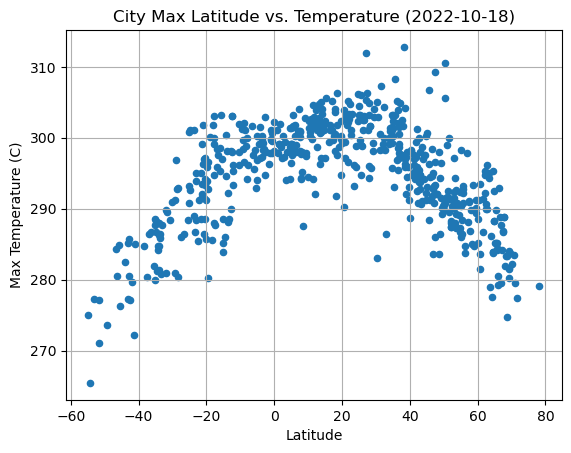

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig1.png'

<Figure size 640x480 with 0 Axes>

In [15]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x='Lat', y='Max Temp', title='City Max Latitude vs. Temperature (2022-10-18)')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)
plt.show()
                
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

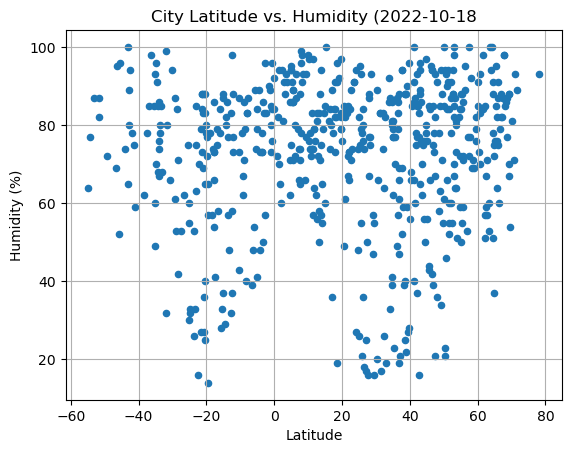

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig2.png'

<Figure size 640x480 with 0 Axes>

In [16]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x='Lat', y='Humidity', title='City Latitude vs. Humidity (2022-10-18')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

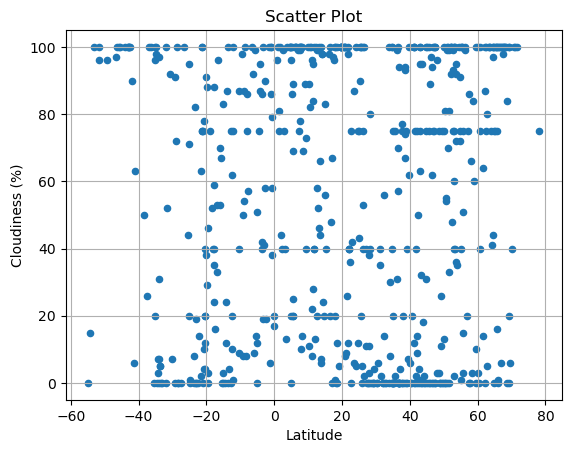

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig3.png'

<Figure size 640x480 with 0 Axes>

In [18]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x='Lat', y='Cloudiness', title='Latitude to Cloudiness')


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

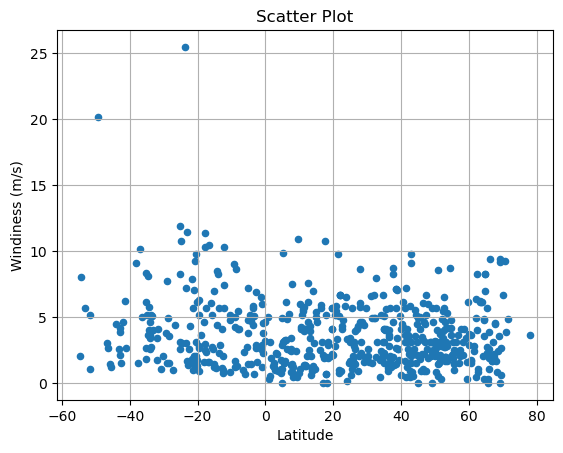

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig4.png'

<Figure size 640x480 with 0 Axes>

In [19]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x='Lat', y='Wind Speed', title='Scatter Plot')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Windiness (m/s)')
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
def perform_linear_regression(x, y):
    slope, intercept = np.polyfit(x, y, 1)
    regression_line = slope * x + intercept
    return regression_line, slope, intercept


In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,albany,42.6001,-73.9662,295.51,83,4,0.89,US,1692322486
5,hirara,24.8000,125.2833,302.30,74,75,1.54,JP,1692322523
7,vernon,50.2581,-119.2691,310.54,21,0,2.68,CA,1692322524
9,tarfaya,27.9358,-12.9218,294.37,88,38,8.62,MA,1692322525
10,ebon,4.5820,168.6964,301.33,71,100,1.73,MH,1692322525


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,271.13,82,96,1.08,CL,1692322288
1,hermanus,-34.4187,19.2345,284.71,85,3,5.76,ZA,1692322522
2,ushuaia,-54.8000,-68.3000,274.96,64,0,2.06,AR,1692322301
4,grytviken,-54.2811,-36.5092,265.43,77,15,8.04,GS,1692322493
6,port-aux-francais,-49.3500,70.2167,273.63,72,96,20.19,TF,1692322524


###  Temperature vs. Latitude Linear Regression Plot

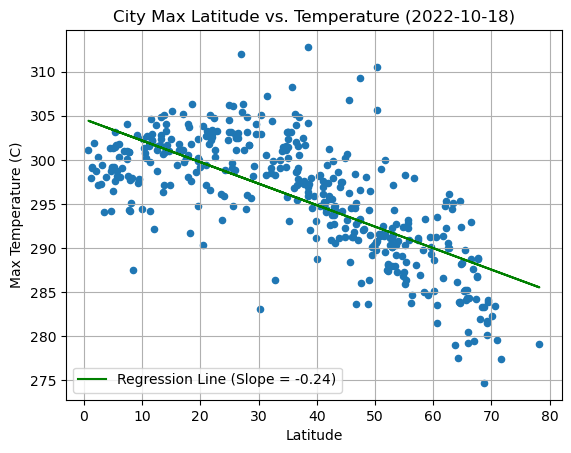

In [30]:
# Linear regression on Northern Hemisphere
fig, ax = plt.subplots()
northern_hemi_df.plot.scatter(x='Lat', y='Max Temp', ax=ax, title='City Max Latitude vs. Temperature (2022-10-18)')

regression_line, slope, intercept = perform_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

ax.plot(northern_hemi_df['Lat'], regression_line, label=f'Regression Line (Slope = {slope:.2f})', color='red')

# Incorporate the other graph properties
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temperature (C)')
ax.grid(True)
ax.legend()

# Show the plot
plt.show()


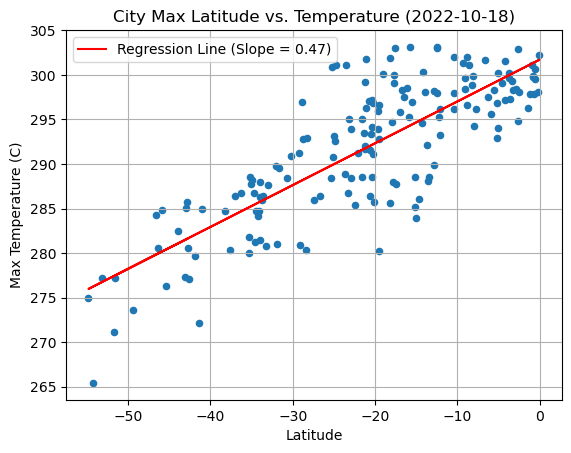

In [33]:
# Linear regression on Southern Hemisphere
fig, ax = plt.subplots()
southern_hemi_df.plot.scatter(x='Lat', y='Max Temp', ax=ax, title='City Max Latitude vs. Temperature (2022-10-18)')

regression_line, slope, intercept = perform_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

ax.plot(southern_hemi_df['Lat'], regression_line, label=f'Regression Line (Slope = {slope:.2f})', color='red')

# Incorporate the other graph properties
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temperature (C)')
ax.grid(True)
ax.legend()

# Show the plot
plt.show()


**Discussion about the linear relationship: There seems to be a strong coorelatoin between Latitude and Temperature. The further away you get from the equator the colder the Temperature becoems.

### Humidity vs. Latitude Linear Regression Plot

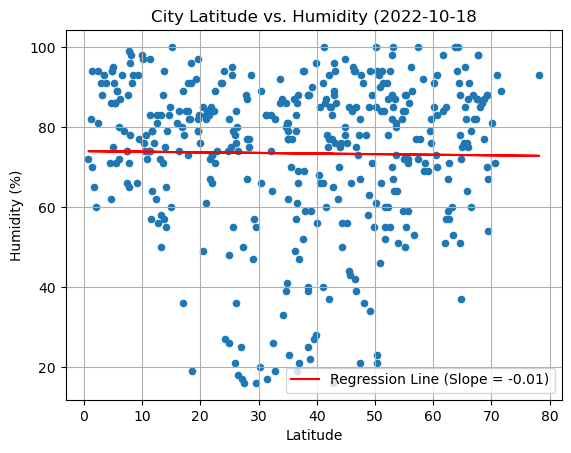

In [34]:
# Northern Hemisphere
fig, ax = plt.subplots()
northern_hemi_df.plot.scatter(x='Lat', y='Humidity', ax=ax, title='City Latitude vs. Humidity (2022-10-18')

regression_line, slope, intercept = perform_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

ax.plot(northern_hemi_df['Lat'], regression_line, label=f'Regression Line (Slope = {slope:.2f})', color='red')

# Incorporate the other graph properties
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')
ax.grid(True)
ax.legend()

# Show the plot
plt.show()


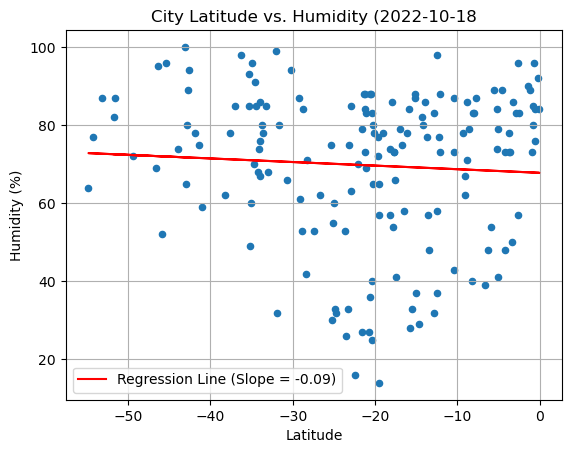

In [35]:
# Southern Hemisphere
fig, ax = plt.subplots()
southern_hemi_df.plot.scatter(x='Lat', y='Humidity', ax=ax, title='City Latitude vs. Humidity (2022-10-18')

regression_line, slope, intercept = perform_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

ax.plot(southern_hemi_df['Lat'], regression_line, label=f'Regression Line (Slope = {slope:.2f})', color='red')

# Incorporate the other graph properties
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')
ax.grid(True)
ax.legend()

# Show the plot
plt.show()


**Discussion about the linear relationship: There is no coorelation between humidity and latitude. However, north or south you travel will not have a direct effect on the humidity.

### Cloudiness vs. Latitude Linear Regression Plot

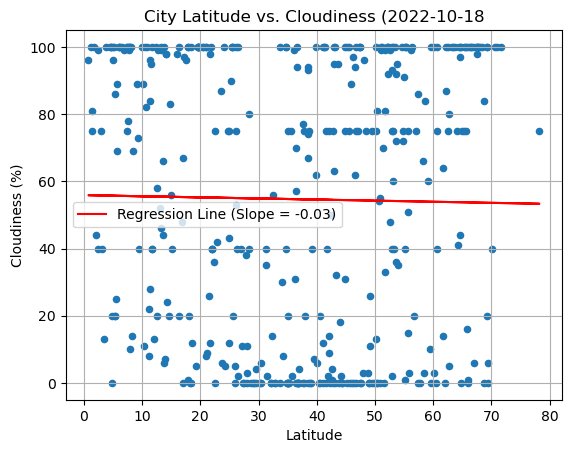

In [42]:
# Northern Hemisphere
fig, ax = plt.subplots()
northern_hemi_df.plot.scatter(x='Lat', y='Cloudiness', ax=ax, title='City Latitude vs. Cloudiness (2022-10-18')

regression_line, slope, intercept = perform_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

ax.plot(northern_hemi_df['Lat'], regression_line, label=f'Regression Line (Slope = {slope:.2f})', color='red')

# Incorporate the other graph properties
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')
ax.grid(True)
ax.legend()

# Show the plot
plt.show()


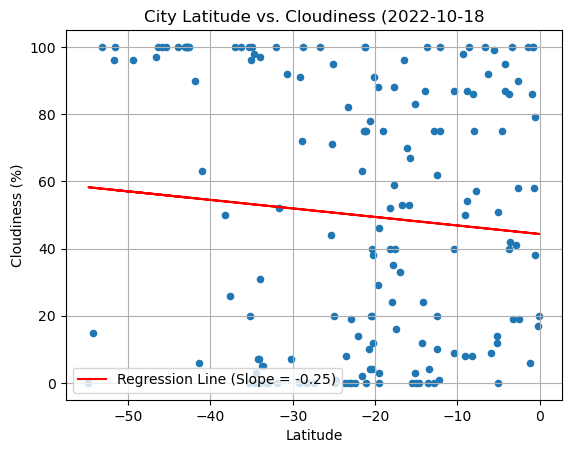

In [41]:
# Southern Hemisphere
fig, ax = plt.subplots()
southern_hemi_df.plot.scatter(x='Lat', y='Cloudiness', ax=ax, title='City Latitude vs. Cloudiness (2022-10-18')

regression_line, slope, intercept = perform_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

ax.plot(southern_hemi_df['Lat'], regression_line, label=f'Regression Line (Slope = {slope:.2f})', color='red')

# Incorporate the other graph properties
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')
ax.grid(True)
ax.legend()

# Show the plot
plt.show()


**Discussion about the linear relationship: There seems to be no rlation between cloudiness and latitude either.

### Wind Speed vs. Latitude Linear Regression Plot

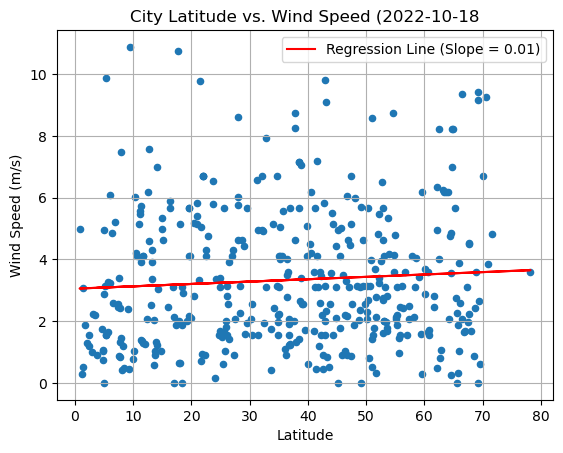

In [43]:
# Northern Hemisphere
fig, ax = plt.subplots()
northern_hemi_df.plot.scatter(x='Lat', y='Wind Speed', ax=ax, title='City Latitude vs. Wind Speed (2022-10-18')

regression_line, slope, intercept = perform_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

ax.plot(northern_hemi_df['Lat'], regression_line, label=f'Regression Line (Slope = {slope:.2f})', color='red')

# Incorporate the other graph properties
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (m/s)')
ax.grid(True)
ax.legend()

# Show the plot
plt.show()


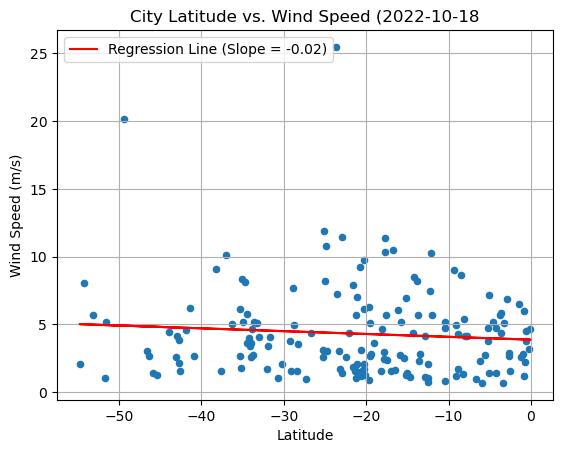

In [44]:
# Southern Hemisphere
fig, ax = plt.subplots()
southern_hemi_df.plot.scatter(x='Lat', y='Wind Speed', ax=ax, title='City Latitude vs. Wind Speed (2022-10-18')

regression_line, slope, intercept = perform_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

ax.plot(southern_hemi_df['Lat'], regression_line, label=f'Regression Line (Slope = {slope:.2f})', color='red')

# Incorporate the other graph properties
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (m/s)')
ax.grid(True)
ax.legend()

# Show the plot
plt.show()


**Discussion about the linear relationship: Similarly, there is no significant change in wind speed as you travel north or south.